In [25]:
#A quick overview of 3D graphs, and a few small things to make your life easier when plotting and showing 3D
#data such as changing the angles they're shown

#Usual 3 imports you'd need. 
#%matplotlib inline simply makes sure figures are rendered properly in a notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Specifically for 3D plots though, you might need to include this
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

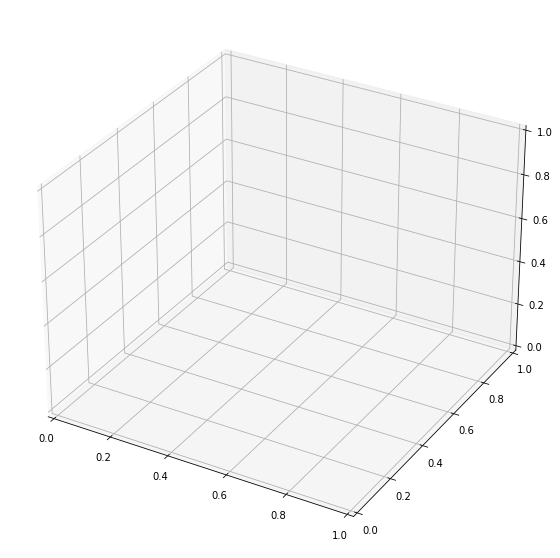

In [26]:
Fig = plt.figure(1)
Fig.set_size_inches(10,10)

#Because 3D plots change the axes, you need to tell matplotlib you're not making the standard 2D axes here
ax = Fig.add_subplot(111,projection='3d')

In [27]:
#Most aspects of 3D graphs are the same as 2D luckily

#Here though we'll demonstrate one thing to bear in mind for surface, histogram style data
#Normally for 2d graphs you only need to give it a grid of 'height' values of the histogram.
#Here, we need to use meshgrid to make X and Y arrays, each of which show the range and repeat themselves
X = np.arange(-5, 5.1, 0.25)
Y = np.arange(-5, 5.1, 0.25)
X, Y = np.meshgrid(X, Y) #Essentially making X and Y 2d repeating arrays 
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)+np.tan((X+4)/6)

#See how while Y is just a 1D sequence from -5 to 5, we need to use meshgrid to repeat this in the other axis
print(X)

[[-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 [-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 [-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 ...
 [-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 [-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 [-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]]


In [28]:
#Hence, with these ranges, X and Y are interchangable by simple transposing
print(Y)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]
 [ 5.    5.    5.   ...  5.    5.    5.  ]]


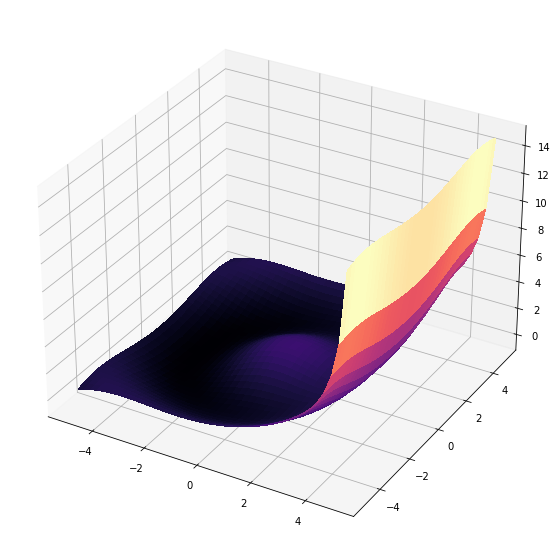

In [29]:
surf = ax.plot_surface(X, Y, Z, 
                       rstride=1, cstride=1, #Effectively a step size
                       cmap='magma',
                       antialiased=False) #Makes the surface opaque
Fig

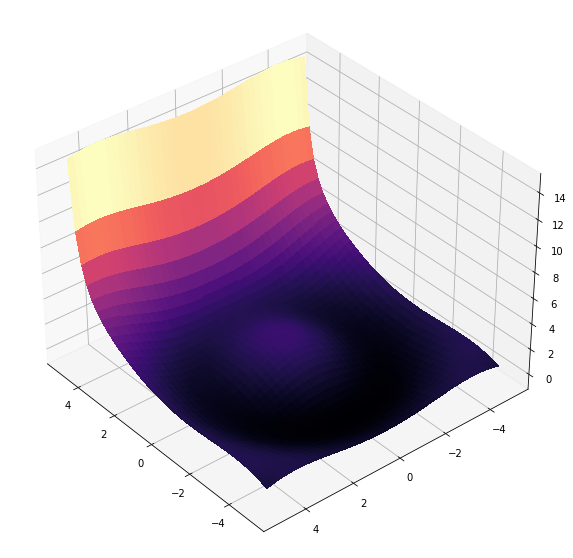

In [30]:
#If we don't like the angle that it's showing the figure in, we can easily modify this as below
axx = ax                                                                                                                                                                                                                                                                                          
azm = axx.azim
ele = axx.elev

ax.view_init(azim=140, elev=35) #Note that we don't need to replot the figure or anything
Fig

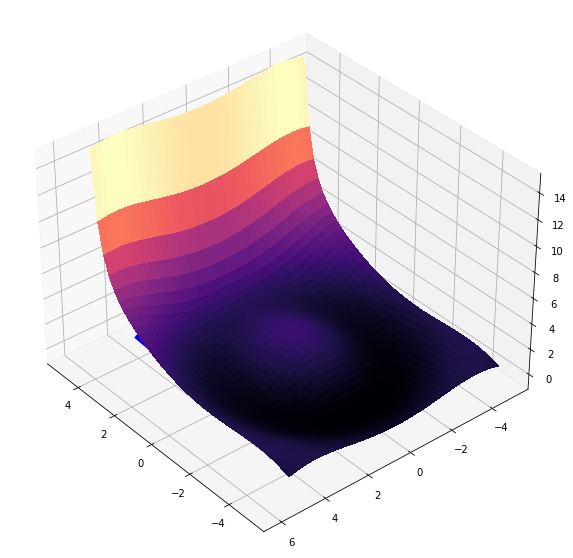

In [31]:
#This is where limitations of 3D plotting in matplotlib starts to show. Here, we plot a line that
#Should be sticking out over the surface plot at points. Notice how it just... doesn't
ax.plot([-4,4],[6,4],[4,0.5],linewidth=5,c='blue')
Fig

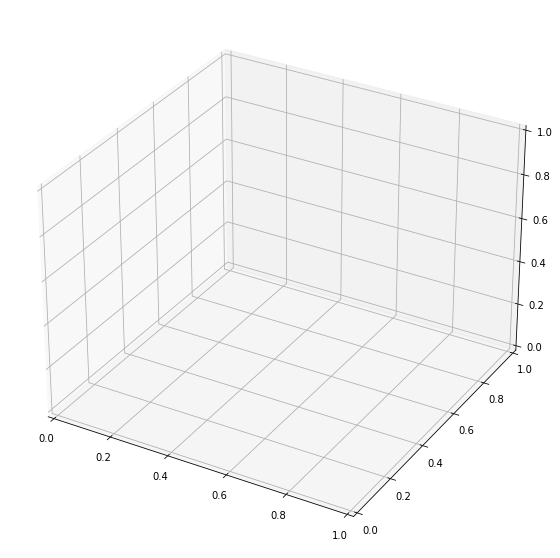

In [32]:
#Normally, when you make a 3D axes matplotlib chooses the zorder.
#Generally, it puts the last thing you plot in the front, but priority is often given to surface plots and the like
Fig = plt.figure(1)
Fig.set_size_inches(10,10)

#Here, we're gonna disable matplotlib doing that so we can do it all ourselves
ax = Fig.add_subplot(111,projection='3d',computed_zorder=False)

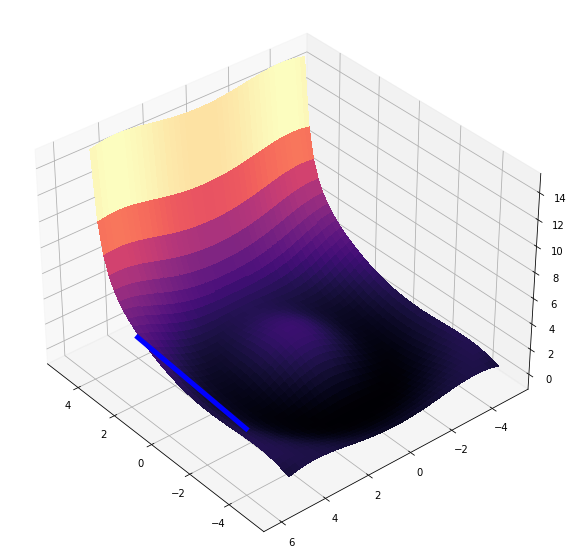

In [33]:
#Now we'll give the surface plot a lower zorder than the line
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma',
                       antialiased=False,zorder=0)
axx = ax                                                                                                                                                                                                                                                                                          
azm = axx.azim
ele = axx.elev

ax.view_init(azim=140, elev=35) #Note that we don't need to replot the figure or anything
ax.plot([-4,4],[6,4],[4,0.5],linewidth=5,c='blue',zorder=1)
Fig
#What's below isn't perfect still though, as now parts of the line which should be below the figure 
#Are now in front. Matplotlib has no real way of dealing with this, so there's lots of options
#Such as plotting half of the line below and half above (and separating the lines by whatever angle you have
#the figure at etc), this is messy though.